<a href="https://colab.research.google.com/github/smjimenez97/formativa_ejercicio_1/blob/master/Formativa_ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# Gráfica dispersión: Edad y Colesterol

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
pacientes = pd.read_csv("Pacientes.csv")

In [3]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOEXPED     985 non-null    int64 
 1   Enfermedad  985 non-null    object
 2   HIPERTEN    985 non-null    int64 
 3   HIPERGLU    985 non-null    int64 
 4   HDLBAJA     985 non-null    int64 
 5   HIPERTRI    985 non-null    int64 
 6   CINTALTA    985 non-null    int64 
 7   EDAD        985 non-null    int64 
 8   GENERO      985 non-null    int64 
 9   FUMA        985 non-null    int64 
 10  ALCOHOL     985 non-null    int64 
 11  POLIURIA    985 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 92.5+ KB


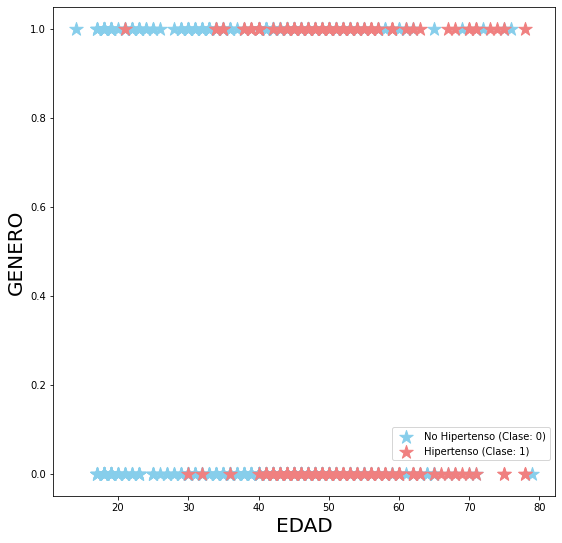

In [4]:
pacientes = pd.read_csv("Pacientes.csv")

hipertenso= pacientes[pacientes["HIPERTEN"]==0]
nohipertenso= pacientes[pacientes["HIPERTEN"]==1]

plt.figure(figsize=(9, 9))
plt.xlabel('EDAD', fontsize = 20.0)
plt.ylabel('GENERO', fontsize = 20.0)
plt.scatter(hipertenso["EDAD"], hipertenso["GENERO"], 
            label="No Hipertenso (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(nohipertenso["EDAD"], nohipertenso["GENERO"],
            label="Hipertenso (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

# Entropía:
Promedio de información almacenada en una variable aleatoria


In [30]:
from scipy.stats import entropy
from math import log



edades = pd.Series([40, 30, 20, 50, 60, 70, 80, 90])
genero = pd.Series([0,1])


print(edades.value_counts()/edades.size)
print(genero.value_counts()/genero.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(genero.value_counts()/genero.size, base=2))

40    0.125
30    0.125
20    0.125
50    0.125
60    0.125
70    0.125
80    0.125
90    0.125
dtype: float64
0    0.5
1    0.5
dtype: float64
3.0
1.0


# Datos de Entrenamiento y Prueba

In [31]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["EDAD", "GENERO"]],
   pacientes["HIPERTEN"], 
    test_size=0.30)

# Creación del Árbol de Decisión

0.7466216216216216
|--- EDAD <= 47.50
|   |--- EDAD <= 31.50
|   |   |--- class: 0
|   |--- EDAD >  31.50
|   |   |--- class: 0
|--- EDAD >  47.50
|   |--- EDAD <= 55.50
|   |   |--- class: 0
|   |--- EDAD >  55.50
|   |   |--- class: 0



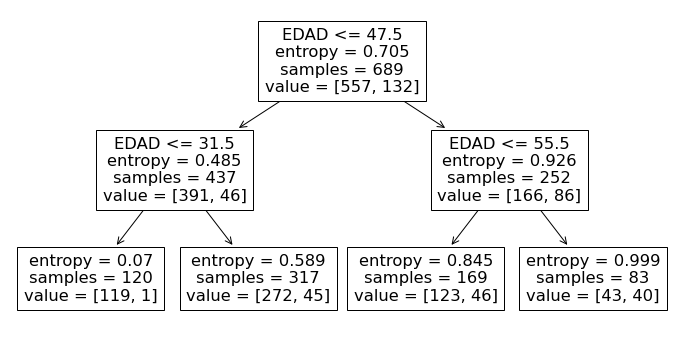

In [32]:
from sklearn import tree
arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["EDAD", "GENERO"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["EDAD", "GENERO"])
plt.show()
